# Data Classification

This dataset is generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. The dataset consists of two classes; gammas (signal) and hadrons (background). There
are 12332 gamma events and 6688 hadron events. You are required to apply preprocessing techniques on this
dataset and use the preprocessed dataset to construct different classification models such as Decision Trees,
Naïve Bayes Classifier, Random Forests, AdaBoost, K-Nearest Neighbor (K-NN) and Support Vector
Machines (SVM). You are also required to tune the parameters of these models, compare the performance of
the learned models before and after preprocessing and compare the performance of models with each other.

## Importing dataset

In [1]:
import pandas as pd

data = pd.read_csv("dataset/magic04.data",
                  names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym",
                           "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"])

In [2]:
display(data.head(10))
print(len(data))

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


19020


## Data balancing
We can notice that there is an imbalance between the number of rows existent in 'g' and the number of rows existent in 'h'.
This problem must be solved by removing random samples from data where class is 'g' until both number of rows are equal.

In [3]:
data_g = data[data['class'] == 'g']
data_h = data[data['class'] == 'h']

print (len(data_g))
print (len(data_h))

12332
6688


In [4]:
data_g = data_g.sample(n=len(data_h))

data = pd.concat([data_g, data_h], ignore_index=True)

In [5]:
print(len(data[data['class'] == 'g']))

6688


## Visualization
Using describe method to check each attribute statistics, we can observe different ranges of values for each attribue. Therefore, normalization should be used to prevent features with large domain of values to dominate other features.

In [6]:
# TODO
import matplotlib.pyplot as plt
display(data.describe())

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.304915,23.664658,2.841802,0.378673,0.214346,-7.723170,7.456622,0.301284,31.320239,195.472145
std,46.998343,20.830662,0.474666,0.184616,0.112230,65.477279,56.337306,23.193880,26.918325,76.458686
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.680275,11.696450,2.493875,0.232100,0.126500,-24.543050,-14.881350,-10.980000,7.341750,142.655175
50%,38.842750,17.198750,2.754600,0.353950,0.197100,2.753250,14.624200,1.264500,23.214800,193.510200
75%,76.169625,26.147700,3.120325,0.505925,0.287025,23.603525,34.982100,11.051100,52.235550,243.040525
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


By using the correlation matrix, that there is high correlation among fLength, fWidth, and fSize features. Another slight correlation between fDist feature and the first 3 features. 

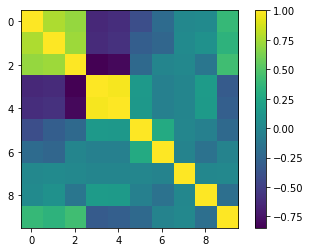

In [7]:
plt.imshow(data.corr())
plt.colorbar()

Box plots can assert our previous claim of features have different ranges of values which may affect the learning process. 

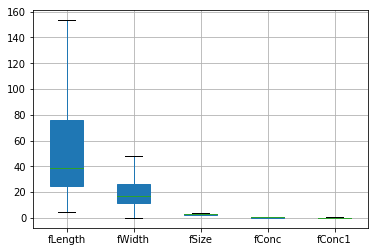

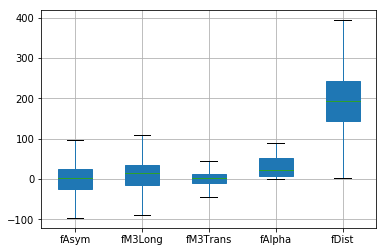

In [8]:
columns = data.columns
box_plots_1 = data.boxplot(column = ['fLength', 'fWidth','fSize','fConc', 'fConc1'], patch_artist = True, showfliers=False)
plt.figure()
box_plots_2 = data.boxplot(column = ['fAsym','fM3Long','fM3Trans', 'fAlpha', 'fDist'], patch_artist = True, showfliers=False)

## Preprocessing
As a result of our conclusions above, it is obvious now that we need to perform 2 important preprocessing steps, features normalization and features selection.
We are going to use z-normalization to normalize the data. We are not going use min-max since there are some alot of outliers in each feature. 
We will also apply PCA to reduce the correlated, unnecessary features in our dataset. 

In [9]:
# TODO 
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(data.loc[:, data.columns != 'class'])
columns = ['pca_%i' % i for i in range(5)]
df_pca = pd.DataFrame(pca.transform(data.loc[:, data.columns != 'class']), columns=columns, index=data.index)
display(df_pca.describe())

,pca_0,pca_1,pca_2,pca_3,pca_4
count,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04,1.337600e+04
mean,8.703299e-15,-7.071430e-15,1.631868e-15,3.263737e-15,5.439562e-16
std,8.578306e+01,6.652539e+01,4.974349e+01,3.997394e+01,2.589696e+01
min,-1.967063e+02,-2.870922e+02,-4.249804e+02,-7.476984e+01,-7.710400e+01
25%,-5.698738e+01,-3.760819e+01,-1.527907e+01,-2.490111e+01,-2.040306e+01
50%,-1.729953e+01,-3.181837e+00,1.468275e+00,-8.914135e+00,-8.286184e+00
75%,3.133116e+01,3.462487e+01,1.725135e+01,1.263520e+01,1.895588e+01
max,3.648615e+02,4.350110e+02,5.473691e+02,3.782528e+02,8.155287e+01


## Data Split
We need to randomly split the data to 70% training set and 30% testing set. We do this by first separating between class column (y) from features (x), and finally use sklearn.

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.3)

In [11]:
print(len(train_df))
print(len(test_df))

9363
4013


## Classification

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from time import time

X_train = train_df.drop('class', axis=1)
y_train = train_df['class']

X_test = test_df.drop('class', axis=1)
y_test = test_df['class']

In [29]:
def model_scores(y_pred, y_test):
    print("Precision Score : " + str(precision_score(y_test, y_pred, average='macro')))
    print("Recall Score : " + str(recall_score(y_test, y_pred, average='macro')))
    print("F Score : " + str(f1_score(y_test, y_pred, average="macro")))
    print("Confusion matrix : " + str(confusion_matrix(y_test, y_pred)))

#### 1. SVM Classifier
The Linear SVM classifier performed badly with accuracy less than **57%**. Which means that the data was not linearly separable. The wide range of C regularization values did not introduce big contribution to the accuracy, which endorses our claim.  

In [30]:
from sklearn import svm
C = [1, 5, 10, 100, 1000]

for c in C:
    start_time = time()
    model = svm.SVC(C=c)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_pred, y_test), " at C = ", c, " time = ", time() - start_time)
    model_scores(y_test, y_pred)

(0.5661599800647894, ' at C = ', 1, ' time = ', 5.55683708190918)
Precision Score : 0.5676060473136271
Recall Score : 0.6681281618887016
F Score : 0.4907788373564793
Confusion matrix : [[ 364   91]
 [1650 1908]]
(0.5693994517817095, ' at C = ', 5, ' time = ', 5.472225904464722)
Precision Score : 0.5708222780705149
Recall Score : 0.6681346707236532
F Score : 0.49738635197358694
Confusion matrix : [[ 383   97]
 [1631 1902]]
(0.5693994517817095, ' at C = ', 10, ' time = ', 6.04211688041687)
Precision Score : 0.5708222780705149
Recall Score : 0.6681346707236532
F Score : 0.49738635197358694
Confusion matrix : [[ 383   97]
 [1631 1902]]
(0.5693994517817095, ' at C = ', 100, ' time = ', 5.3371100425720215)
Precision Score : 0.5708222780705149
Recall Score : 0.6681346707236532
F Score : 0.49738635197358694
Confusion matrix : [[ 383   97]
 [1631 1902]]
(0.5693994517817095, ' at C = ', 1000, ' time = ', 5.754832029342651)
Precision Score : 0.5708222780705149
Recall Score : 0.6681346707236532
F 

#### 2. Naive Bayes Classifier
Bayes Classifier behaved relatively better than SVMs but not as good as AdaBoost. The accuracy was **65%** which indicates that the features are dependent on each other which violates the assumption made by the classifier.

In [32]:
from sklearn.naive_bayes import GaussianNB
start_time = time()
model = GaussianNB()Tmodel_scores(y_test, y_pred)

(0.6503862447047097, ' using Naive Bayes Classifier ', ' time = ', 0.02185988426208496)
Precision Score : 0.6494340765218756
Recall Score : 0.702127069837074
F Score : 0.6256277201928699
Confusion matrix : [[1821 1210]
 [ 193  789]]


#### 3.Decision Tree Classifier
The Decision tree performed much better than previous classifiers. The inaccuracy could be justified by claiming that the decision tree only involves one feature during partitioning at each node. Accuracy was **79%**

In [33]:
from sklearn import tree
start_time = time()
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_pred, y_test), " using Decision Tree Classifier ", " time = ", time() - start_time)
model_scores(y_test, y_pred)

(0.7939197607774732, ' using Decision Tree Classifier ', ' time = ', 0.13717412948608398)
Precision Score : 0.7939122242352556
Recall Score : 0.7939195247952873
F Score : 0.7939146419698394
Confusion matrix : [[1603  416]
 [ 411 1583]]
